## Data preparation for Decision Tree model

I prepared data for Decision Tree(DT) analysis by creating lagged variables


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from matplotlib.pylab import plot
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf


/Users/ZachAnaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/ZachAnaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
water_level = pd.read_csv('cleaned-JPS WL data-kkrai.csv', index_col=0, parse_dates=True)  
water_level.head(5)

,Stage m
Date,
2010-01-01,17.06
2010-02-01,17.00
2010-03-01,17.31
2010-04-01,18.60
2010-05-01,18.15


In [3]:
# check data types
water_level.dtypes

Stage m    float64
dtype: object

In [4]:
# first differencing
water_level['first_diff'] = water_level['Stage m'].diff()
water_level.head()

,Stage m,first_diff
Date,,
2010-01-01,17.06,NaN
2010-02-01,17.00,-0.06
2010-03-01,17.31,0.31
2010-04-01,18.60,1.29
2010-05-01,18.15,-0.45


In [5]:
# drop NaN value
water_level.dropna(inplace=True)


In [6]:
water_level.describe()

,Stage m,first_diff
count,3498.000000,3498.000000
mean,16.638110,-0.000455
std,1.583119,0.558705
min,1.680000,-8.490000
25%,15.830000,-0.140000
50%,16.380000,-0.020000
75%,17.120000,0.100000
max,33.930000,8.760000


In [7]:
# second differencing
water_level['second_diff'] = water_level['Stage m'].diff(2)
water_level.dropna(inplace=True)
water_level.describe()

,Stage m,first_diff,second_diff
count,3496.000000,3496.000000,3496.000000
mean,16.637815,-0.000526,-0.000892
std,1.583519,0.558839,0.934697
min,1.680000,-8.490000,-15.330000
25%,15.830000,-0.140000,-0.240000
50%,16.380000,-0.020000,-0.030000
75%,17.120000,0.100000,0.170000
max,33.930000,8.760000,15.530000


Text(0.5, 1.0, 'WL at Kota Bharu')

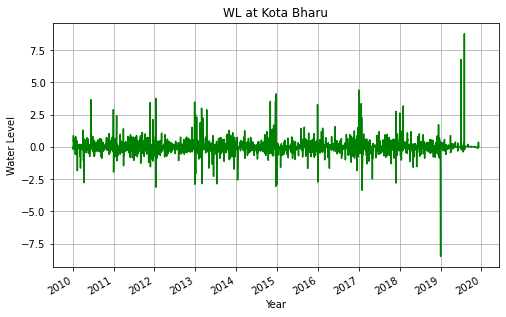

In [8]:
# Plot the time series
# opt for 1st differencing
ax = water_level['first_diff'].plot(color='green', grid=True, figsize=(8,5))
ax.set_xlabel('Year')
ax.set_ylabel('Water Level')
ax.set_title('WL at Kota Bharu')

<AxesSubplot:ylabel='Density'>

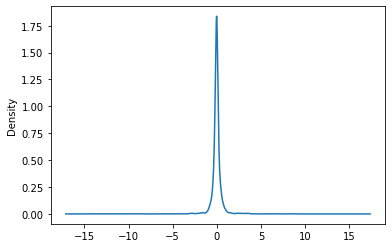

In [9]:
# Plot kernel density plot
water_level['first_diff'].plot(kind='kde')

In [10]:
df_wl = water_level[['first_diff']]
df_wl.head()

,first_diff
Date,
2010-04-01,1.29
2010-05-01,-0.45
2010-06-01,-0.75
2010-07-01,0.06
2010-08-01,0.25


            first_diff
Date                  
2010-04-01        1.29
2010-05-01       -0.45
2010-06-01       -0.75
2010-07-01        0.06
2010-08-01        0.25


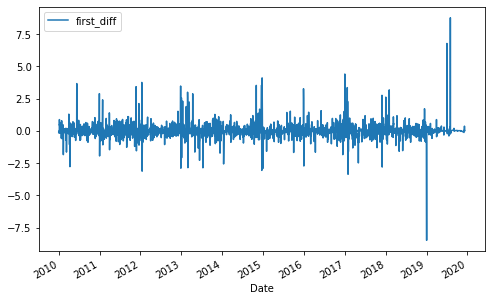

In [11]:
# display first few rows
print(df_wl.head(5))
# line plot of dataset
df_wl.plot(figsize=(8,5))
pyplot.show()

The plot shows that seasonality and trend were removed from the series through differencing. Above is the plot of the differenced data.



In [12]:
df_wl.describe()

,first_diff
count,3496.000000
mean,-0.000526
std,0.558839
min,-8.490000
25%,-0.140000
50%,-0.020000
75%,0.100000
max,8.760000


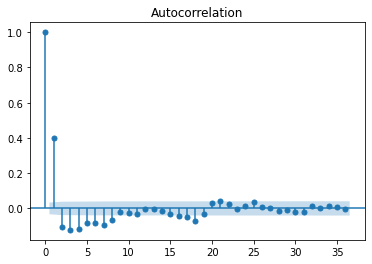

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
# Check for autocorrelation of each lagged observation and whether it is statistically significant.
plot_acf(df_wl)
pyplot.show()

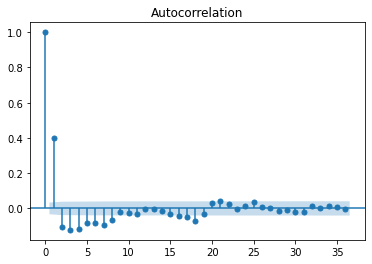

In [14]:
#autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
# Check for autocorrelation of each lagged observation and whether it is statistically significant.
plot_acf(df_wl)
pyplot.show()

The blue shaded region is the margin of uncertainty. Candlesticks that extend out beyond the blue shaded region are considered statistically significant. Correlation values are between 1 and -1.

## Create lagged variables

In [15]:
# create lagged variables
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
wl1 = DataFrame()
print(wl1)

Empty DataFrame
Columns: []
Index: []


In [16]:
# Create 12 months of lag values to predict current observation
# Shift of 12 months
for i in range(12,0,-1):
    wl1[['t-'+str(i)]] = df_wl.shift(i)
print(wl1)

            t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
Date                                                                           
2010-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2010-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2010-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.29   
2010-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.29 -0.45   
2010-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.29 -0.45 -0.75   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2019-07-27  0.00  0.01  0.01 -0.26 -0.40 -0.10 -0.07  0.00  0.16  0.08  0.05   
2019-07-28  0.01  0.01 -0.26 -0.40 -0.10 -0.07  0.00  0.16  0.08  0.05  0.04   
2019-07-29  0.01 -0.26 -0.40 -0.10 -0.07  0.00  0.16  0.08  0.05  0.04  0.02   
2019-07-30 -0.26 -0.40 -0.10 -0.07  0.00  0.16  0.08  0.05  0.04  0.02  0.30   
2019-07-31 -0.40 -0.10 -0.07  0.00  0.16

In [17]:
# Create column t
wl1['t'] = df_wl.values
print(wl1.head(13))

            t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
Date                                                                           
2010-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2010-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2010-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.29   
2010-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.29 -0.45   
2010-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.29 -0.45 -0.75   
2010-09-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.29 -0.45 -0.75  0.06   
2010-10-01   NaN   NaN   NaN   NaN   NaN   NaN  1.29 -0.45 -0.75  0.06  0.25   
2010-11-01   NaN   NaN   NaN   NaN   NaN  1.29 -0.45 -0.75  0.06  0.25 -0.36   
2010-12-01   NaN   NaN   NaN   NaN  1.29 -0.45 -0.75  0.06  0.25 -0.36 -0.34   
2010-01-13   NaN   NaN   NaN  1.29 -0.45 -0.75  0.06  0.25 -0.36 -0.34 -0.26   
2010-01-14   NaN   NaN  1.29 -0.45 -0.75

In [18]:
# Create a new subsetted dataframe, removing Nans from first 12 rows
wl1_kk = wl1[13:]
print(wl1_kk)

            t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
Date                                                                           
2010-01-17 -0.45 -0.75  0.06  0.25 -0.36 -0.34 -0.26 -0.10 -0.11 -0.02 -0.08   
2010-01-18 -0.75  0.06  0.25 -0.36 -0.34 -0.26 -0.10 -0.11 -0.02 -0.08 -0.05   
2010-01-19  0.06  0.25 -0.36 -0.34 -0.26 -0.10 -0.11 -0.02 -0.08 -0.05 -0.08   
2010-01-20  0.25 -0.36 -0.34 -0.26 -0.10 -0.11 -0.02 -0.08 -0.05 -0.08 -0.06   
2010-01-21 -0.36 -0.34 -0.26 -0.10 -0.11 -0.02 -0.08 -0.05 -0.08 -0.06  0.00   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2019-07-27  0.00  0.01  0.01 -0.26 -0.40 -0.10 -0.07  0.00  0.16  0.08  0.05   
2019-07-28  0.01  0.01 -0.26 -0.40 -0.10 -0.07  0.00  0.16  0.08  0.05  0.04   
2019-07-29  0.01 -0.26 -0.40 -0.10 -0.07  0.00  0.16  0.08  0.05  0.04  0.02   
2019-07-30 -0.26 -0.40 -0.10 -0.07  0.00  0.16  0.08  0.05  0.04  0.02  0.30   
2019-07-31 -0.40 -0.10 -0.07  0.00  0.16

In [19]:
# save to new file
wl1_kk.to_csv('waterlevel_lags_features.csv', index=False)